In [1]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import numpy as np
import cv2
import os

# 버전확인

In [2]:
print("matplotlib version: ", mpl.__version__)
print("tensorflow version: ", tf.__version__)
print("numpy version: ", np.__version__)
print("opencv version: ", cv2.__version__)

matplotlib version:  3.6.2
tensorflow version:  2.7.0
numpy version:  1.19.5
opencv version:  4.6.0


# 이미지 예측 로직

haarcascade_frontalface_default.xml가 같은 폴더에 있어야함

In [3]:
def predict_img(sex, img_path):
    '''
    성별과 이미지 경로를 입력받아 예측값을 반환합니다.

        :param sex: 성별입니다. ( 0: 남자, 1: 여자 )
        :param img_path: 사진 경로입니다.
        :return: 확률 내림차순으로 정렬된 list형의 결과를 반환합니다. 얼굴이 검출되지 않았을 경우 False를 반환합니다. ex) [(확률, 라벨), (확률, 라벨), ...]
    '''
    # 성별에 따라 모델 불러오기 (sex == 'm' or 'f')
    if sex:
        model = tf.keras.models.load_model('model_women.h5')
        celebrity = ['나연', '박나래', '솔라', '박은빈', '박진주', '에일리', '이국주', '제니', '주현영', '츄', '미주']
    else:
        model = tf.keras.models.load_model('model_men.h5')
        celebrity = ['마동석', '문빈', '박보검', '비', '손석구', '송강', '송강호', '유재석', '조우진', '지코', '차은우']
    
    # 이미지 읽어오기
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # 얼굴만 crop
    face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    face = face_cascade.detectMultiScale(gray_img, 1.3, 5)
    # 얼굴 감지 실패할 경우 False 반환
    if len(face) == 0:
        return False
    
    (x,y,w,h) = face[0]
    # # 얼굴에 박스 칠 경우 밑 코드 활성화
    # cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 2)
    cropped = img[y: y+h, x: x+w]
    resize = cv2.resize(cropped, (180,180))

    # 모델 예측
    predict_result = model.predict(resize.reshape(1,180,180,3))[0]
    result = [(round(predict_result[idx], 5)*100, celeb) for idx, celeb in enumerate(celebrity)]
    img = np.array(resize)
    plt.imshow(img)

    # 예측 결과를 확률 순으로 정렬 후 반환 (상위 n개만 뽑아쓸 수 있게)
    return sorted(result, reverse=True)

[(99.86400008201599, '송강호'), (0.08699999889358878, '마동석'), (0.03999999898951501, '조우진'), (0.007999999797903001, '손석구'), (0.0, '차은우'), (0.0, '지코'), (0.0, '유재석'), (0.0, '송강'), (0.0, '비'), (0.0, '박보검'), (0.0, '문빈')]


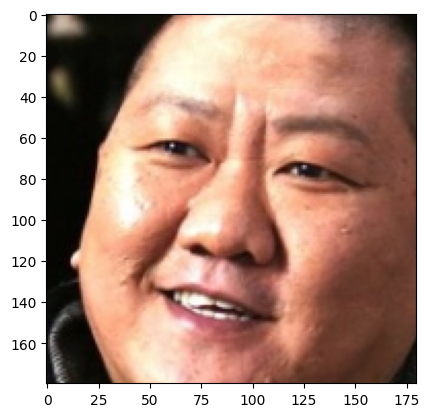

In [4]:
print(predict_img(0, '../test.jpg'))

[(73.80800247192383, '조우진'), (20.993000268936157, '마동석'), (2.848000079393387, '송강호'), (2.281999960541725, '손석구'), (0.023999999393709004, '지코'), (0.02300000051036477, '비'), (0.019999999494757503, '차은우'), (0.0009999999747378752, '박보검'), (0.0, '유재석'), (0.0, '송강'), (0.0, '문빈')]


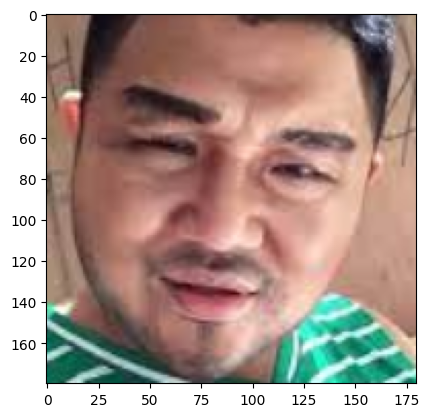

In [5]:
print(predict_img(0, '../test2.jpg'))

[(48.82499873638153, '조우진'), (45.906001329422, '마동석'), (2.9899999499320984, '송강호'), (1.8789999186992645, '손석구'), (0.3000000026077032, '비'), (0.06500000017695129, '지코'), (0.03399999986868352, '박보검'), (0.0009999999747378752, '송강'), (0.0009999999747378752, '문빈'), (0.0, '차은우'), (0.0, '유재석')]


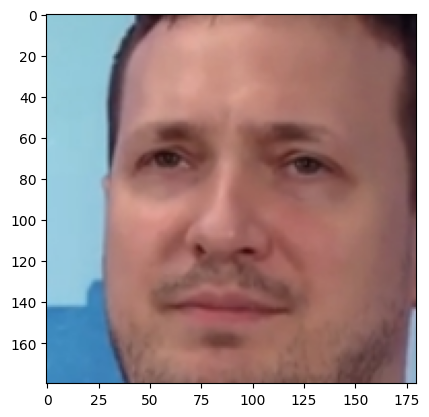

In [6]:
print(predict_img(0, '../test3.jpg'))

[(97.22099900245667, '마동석'), (2.6410000398755074, '손석구'), (0.11099999537691474, '조우진'), (0.022000000171829015, '비'), (0.0029999999242136255, '지코'), (0.0019999999494757503, '차은우'), (0.0, '유재석'), (0.0, '송강호'), (0.0, '송강'), (0.0, '박보검'), (0.0, '문빈')]


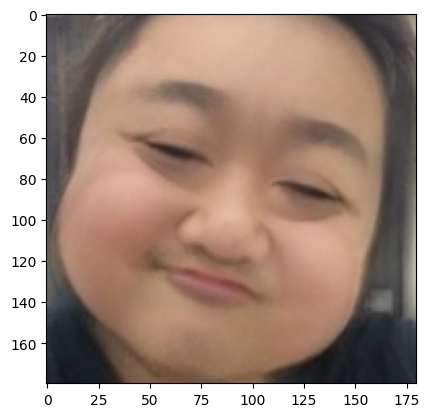

In [7]:
print(predict_img(0, '../test4.jpg'))